In [1]:
import numpy as np
import pandas as pd
import time 
import re

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
english_stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# machine learning

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from tensorflow.keras.utils import to_categorical

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D



from sklearn.metrics import classification_report

import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)
# adding column names for the csv file which wi

In [2]:
headers=['Tweet_ID','Entity','Sentiment','Tweet_content']
# read data from training dataset
t_df=pd.read_csv('D:\\fa project\\twitter_training.csv', sep=',', names=headers)
# read data from validation dataset
v_df=pd.read_csv('D:\\fa project\\twitter_validation.csv', sep=',', names=headers)

In [3]:
# information of the dataset
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
# first 10 rows of training dataset
t_df.head(10)

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [5]:
# first 5 rows of validation dataset
v_df.head(5)

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [6]:
# value count of the training dataset
t_df.value_counts(normalize=True)

Tweet_ID  Entity                             Sentiment   Tweet_content                                                                                                                  
3018      Dota2                              Positive    Wow.                                                                                                                               0.000068
4050      CS-GO                              Positive    Wow                                                                                                                                0.000068
10181     PlayerUnknownsBattlegrounds(PUBG)  Irrelevant  Really                                                                                                                             0.000068
8808      Nvidia                             Positive    Wow                                                                                                                                0.000068
6928      johnson&johnson  

In [7]:
# information of training dataset
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
# Getting the count of 3 classes (sentiments)
t_df['Sentiment'].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

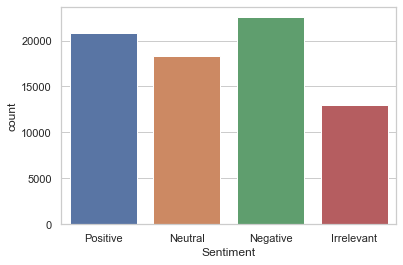

In [9]:
# plotting countplot using seaborn package based on total count of different sentiments in training dataset
sns.countplot(x=t_df['Sentiment'])

In [10]:
# sum of duplicate values in training dataset
t_df.duplicated().sum()

2700

<AxesSubplot:ylabel='Sentiment'>

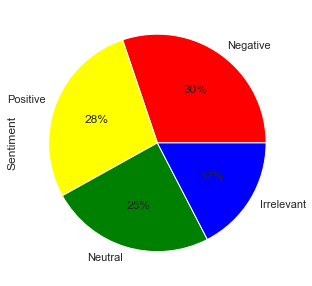

In [11]:
# pie chart using seaborn based on total count of different sentiments in training dataset 
t_df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(5,5),colors=["red", "yellow", "green",'blue'])

<AxesSubplot:xlabel='Entity'>

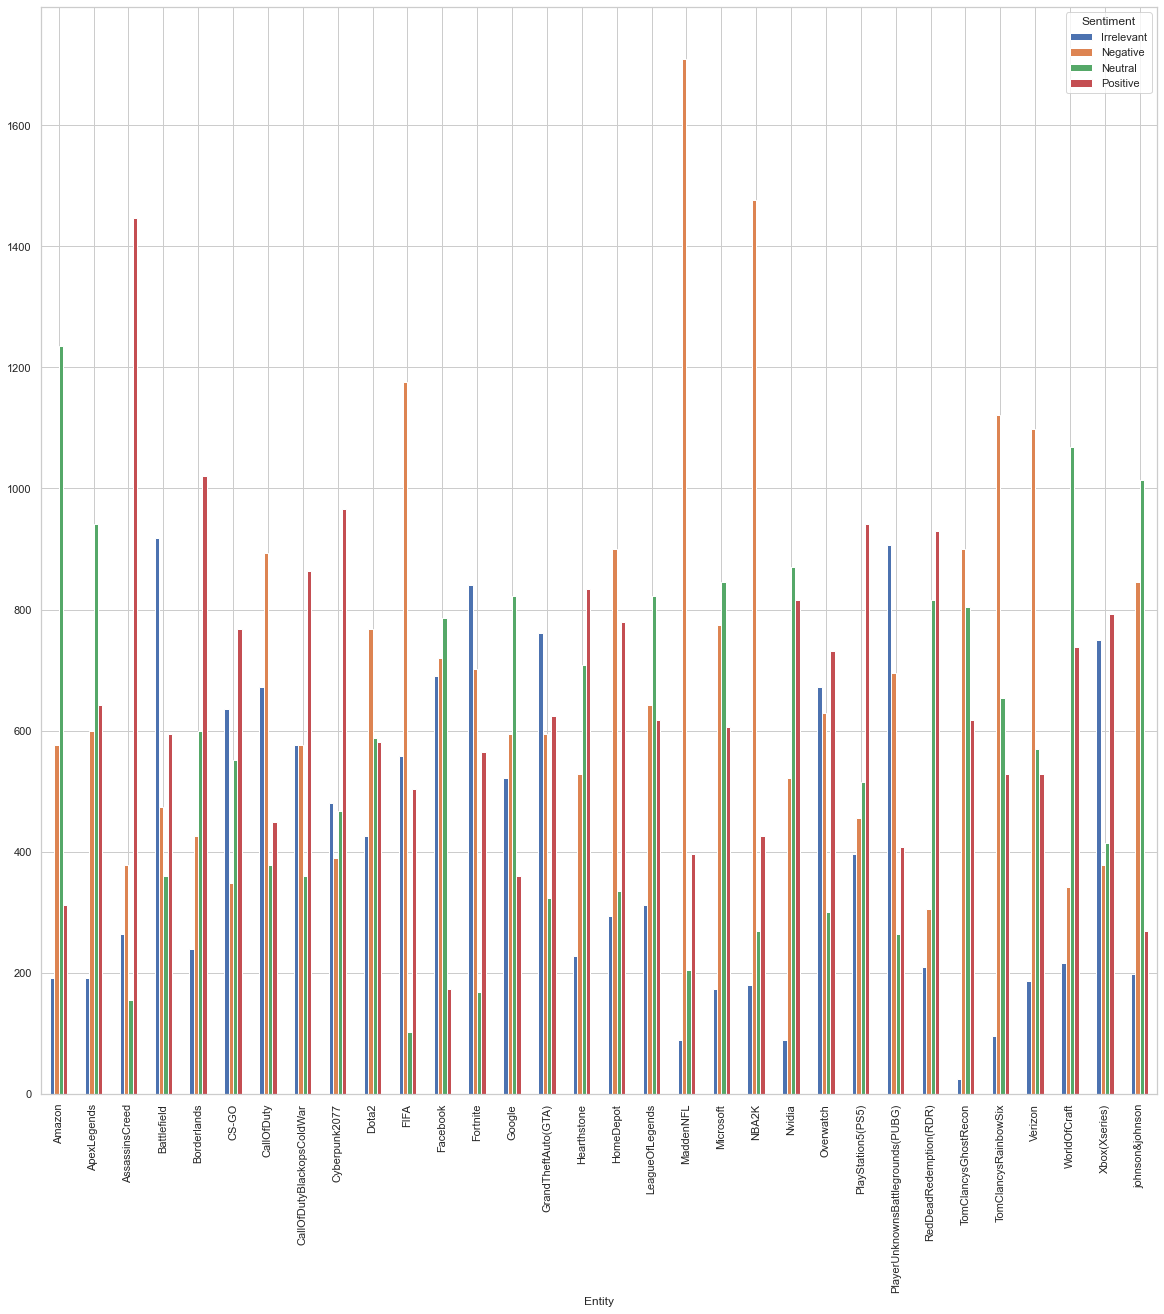

In [12]:
# entity vs sentiment relation 
Twitter_sentiment = t_df.groupby(['Entity', 'Sentiment']).Sentiment.count().unstack()
Twitter_sentiment.plot(kind='bar',figsize=(20,20))

In [13]:
# encoder for target feature
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
# converting string based sentiments into numeric valuye which can be further used for training ML algorithm
t_df['Sentiment']=lb.fit_transform(t_df['Sentiment'])
t_df.head(5)

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...
1,2401,Borderlands,3,I am coming to the borders and I will kill you...
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...
3,2401,Borderlands,3,im coming on borderlands and i will murder you...
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...


In [14]:
v_df['Sentiment']=lb.fit_transform(v_df['Sentiment'])
v_df.head(5)

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,0,I mentioned on Facebook that I was struggling ...
1,352,Amazon,2,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,1,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,1,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,2,Now the President is slapping Americans in the...


In [15]:
# check 'nan' value in tweet_content and summation of it
t_df['Tweet_content'].isnull().sum()

686

In [16]:
# drop all null value from tweet_content
t_df.dropna(axis=0, inplace=True)

In [17]:
# training data feature
tweet_train = t_df["Tweet_content"]
# valiation data feature
tweet_valid = v_df["Tweet_content"]
# training data output value
target_train = t_df['Sentiment']
# validation data output value
target_valid = v_df['Sentiment']

In [18]:
print("Trining data is:",tweet_train.shape[0],"Validation data is:",tweet_valid.shape[0])

Trining data is: 73996 Validation data is: 1000


In [19]:
REPLACE_WITH_SPACE = re.compile("(@)")
SPACE = " "

# preprocess on the tweets and removing @ 
def preprocess_reviews(reviews):  
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line.lower()) for line in reviews]
    
    return reviews

# preprocess training data based of tweets
reviews_train_clean = preprocess_reviews(tweet_train)
# preprocess validation data based of tweets
reviews_valid_clean = preprocess_reviews(tweet_valid)

In [20]:
# removing all stop words and doing further p;reprocessing on the tweets data
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words

# removing stop words from training data
no_stop_words_train = remove_stop_words(reviews_train_clean)
# removing stop words from validation data
no_stop_words_valid = remove_stop_words(reviews_valid_clean)

In [21]:
# created a function for stemming words
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

# stemming text on train data
stemmed_reviews_train = get_stemmed_text(no_stop_words_train)
# stemming text on validation data
stemmed_reviews_valid = get_stemmed_text(no_stop_words_valid)

In [22]:
# using Tokenizer method to filter out special character and initializing its method
tokenizer = Tokenizer(
    num_words = 8000,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
)

In [23]:
# using Tokenizer method converting training tweets data to 3000 features
tokenizer.fit_on_texts(tweet_train)
X_train = tokenizer.texts_to_sequences(tweet_train)
X_train = pad_sequences(X_train, maxlen = 3000)

In [24]:
# using Tokenizer method converting validation tweets data to 3000 features
tokenizer.fit_on_texts(tweet_valid)
X_valid = tokenizer.texts_to_sequences(tweet_valid)
X_valid = pad_sequences(X_valid, maxlen = 3000)

In [25]:
print("Training features:",X_train.shape)
print("Training labels:", target_train.shape)
print("Validation features:",X_valid.shape)
print("Validation labels:", target_valid.shape)

Training features: (73996, 3000)
Training labels: (73996,)
Validation features: (1000, 3000)
Validation labels: (1000,)


In [26]:
# initializing random forest classifier model
text_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
# training the model with X_train (features) and target_train (label) training data
text_classifier.fit(X_train, target_train)
# Prediction of validation data (X_valid) and storing prediction result in y_pred
y_pred = text_classifier.predict(X_valid)
# generating classification_report based on predicted outcome vs actual outcome of validation data
print(classification_report(target_valid,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57       172
           1       0.60      0.78      0.68       266
           2       0.67      0.59      0.63       285
           3       0.76      0.62      0.69       277

    accuracy                           0.65      1000
   macro avg       0.65      0.64      0.64      1000
weighted avg       0.66      0.65      0.65      1000



# deep learning based custom model approach


In [27]:
# training data feature
tweet_train = t_df["Tweet_content"]
# valiation data feature
tweet_valid = v_df["Tweet_content"]
# training data output value
target_train = t_df['Sentiment']
# validation data output value
target_valid = v_df['Sentiment']

In [28]:
# using Tokenizer method to filter out special character and initializing its method
tokenizer = Tokenizer(
    num_words = 8000,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
)

In [29]:
# using Tokenizer method converting training tweets data to 3000 features
tokenizer.fit_on_texts(tweet_train)
x_train = tokenizer.texts_to_sequences(tweet_train)
x_train = pad_sequences(x_train, maxlen = 3000)

In [30]:
# using Tokenizer method converting validation tweets data to 3000 features
tokenizer.fit_on_texts(tweet_valid)
x_valid = tokenizer.texts_to_sequences(tweet_valid)
x_valid = pad_sequences(x_valid, maxlen = 3000)

In [31]:
# converting labels into one-hot encoding form
y_train = to_categorical(target_train)
y_valid = to_categorical(target_valid)

In [32]:
# creating a sequential model with dense layers, dropouts and all activation function as relu to remove 
#negative value and last activation function as softamx for getting final value and initialized weights in first two layer
model = Sequential()
model.add(Dense(128, input_dim = x_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384128    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               1

In [33]:
# compiling the custom DL based model with loss calculated on the basis of categorical_crossentropy, with adam optimizer and used accuracy as metrics
model.compile(loss='categorical_crossentropy',
                 optimizer='adam', metrics=["accuracy"])

In [34]:
print("Training features:",x_train.shape)
print("Training labels:", y_train.shape)
print("Validation features:",x_valid.shape)
print("Validation labels:", y_valid.shape)

Training features: (73996, 3000)
Training labels: (73996, 4)
Validation features: (1000, 3000)
Validation labels: (1000, 4)


In [35]:
# training the model with x_train as training features and y_train as labels and validation data with (x_valid, y_valid) for validation
# Here I have used bacth size of 128 with only 20 epochs
model.fit(x_train, y_train, batch_size=128 , epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
579/579 [==============================] - 38s 62ms/step - loss: 1.4408 - accuracy: 0.3023 - val_loss: 1.3583 - val_accuracy: 0.3190
Epoch 2/20
579/579 [==============================] - 35s 60ms/step - loss: 1.3564 - accuracy: 0.3269 - val_loss: 1.3630 - val_accuracy: 0.3150
Epoch 3/20
579/579 [==============================] - 36s 62ms/step - loss: 1.3515 - accuracy: 0.3373 - val_loss: 1.3515 - val_accuracy: 0.3490
Epoch 4/20
579/579 [==============================] - 34s 58ms/step - loss: 1.3491 - accuracy: 0.3408 - val_loss: 1.3479 - val_accuracy: 0.3440
Epoch 5/20
579/579 [==============================] - 32s 56ms/step - loss: 1.3468 - accuracy: 0.3448 - val_loss: 1.3527 - val_accuracy: 0.3500
Epoch 6/20
579/579 [==============================] - 33s 57ms/step - loss: 1.3454 - accuracy: 0.3449 - val_loss: 1.3524 - val_accuracy: 0.3290
Epoch 7/20
579/579 [==============================] - 33s 56ms/step - loss: 1.3435 - accuracy: 0.3474 - val_loss: 1.3514 - val_accuracy:

In [36]:
from transformers import pipeline

In [37]:
from datasets import load_dataset
from datasets import Dataset


In [38]:
dataset = Dataset.from_pandas(t_df)


In [39]:
dataset

Dataset({
    features: ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_content', '__index_level_0__'],
    num_rows: 73996
})

In [40]:
dataset[10]

{'Tweet_ID': 2402,
 'Entity': 'Borderlands',
 'Sentiment': 3,
 'Tweet_content': "2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg",
 '__index_level_0__': 10}

In [41]:
dataset["Tweet_content"]

['im getting on borderlands and i will murder you all ,',
 'I am coming to the borders and I will kill you all,',
 'im getting on borderlands and i will kill you all,',
 'im coming on borderlands and i will murder you all,',
 'im getting on borderlands 2 and i will murder you me all,',
 'im getting into borderlands and i can murder you all,',
 "So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg",
 "So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg",
 "So I spent a few hours doing something for fun... If you don't k

In [42]:
classifier1 = pipeline("sentiment-analysis",
                         model="siebert/sentiment-roberta-large-english"
                        )

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [43]:
classifier1(dataset["Tweet_content"][:5])

[{'label': 'NEGATIVE', 'score': 0.9941444993019104},
 {'label': 'NEGATIVE', 'score': 0.9909069538116455},
 {'label': 'NEGATIVE', 'score': 0.9928162097930908},
 {'label': 'NEGATIVE', 'score': 0.9927037954330444},
 {'label': 'NEGATIVE', 'score': 0.9919548630714417}]

In [44]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

C:\ProgramData\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Kartik\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-cased-distilled-squad were not used when initializing TFDistilBertForQuestionAnswering: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-cased-distilled-squad and are newly initialized: ['dropout_96']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [45]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to t5-small and revision d769bba (https://huggingface.co/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

C:\ProgramData\Anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [48]:
summarizer(dataset["Tweet_content"][:5],max_length=50)

Your max_length is set to 50, but you input_length is only 17. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 50, but you input_length is only 16. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 50, but you input_length is only 16. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 50, but you input_length is only 16. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 50, but you input_length is only 18. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[{'summary_text': "im getting on borderlands and i will murder you all . i'm getting on the border and will kill you all, i want to kill you ."},
 {'summary_text': "i am coming to the borders and I will kill you all . i'll kill you, and i will kill all you, i hope ."},
 {'summary_text': "im getting on borderlands and i will kill you all, i am getting on the border . i'm getting on . borderlands, but i want to kill you ."},
 {'summary_text': "im coming on borderlands and i will murder you all, i'm coming on . borderlands is a border land and borderlands borderlands . i want to kill you all ."},
 {'summary_text': "im getting on borderlands 2 and i will murder you me all . i'm gonna murder you all, i am getting on the border . borderlands ."}]

In [49]:
generator = pipeline('text-generation', model = 'gpt2')

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/498M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [50]:
generator(dataset["Tweet_content"][:5], max_length = 30, num_return_sequences=3)


Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence
Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence
Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence
Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence
Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


[[{'generated_text': 'im getting on borderlands and i will murder you all , you wont be able to stop me unless i get the fucking wager you all will kill'},
  {'generated_text': 'im getting on borderlands and i will murder you all , even if you dont know who they belong to. Your ass wasnt built to die in'},
  {'generated_text': 'im getting on borderlands and i will murder you all ,and so on that shit is fucking fucked up and i am just really disgusted that people thought'}],
 [{'generated_text': "I am coming to the borders and I will kill you all, and I have a job to do. If you want to die, I'm here"},
  {'generated_text': 'I am coming to the borders and I will kill you all,\n\nbut at the bottom of the barrel, I will never leave.\n\n\n'},
  {'generated_text': 'I am coming to the borders and I will kill you all, but if my son pleases the Lord Almighty he will surely choose a nation of his'}],
 [{'generated_text': 'im getting on borderlands and i will kill you all, so do not fight me with